**BANK MARKETING** **DATASET** ppt

https://drive.google.com/file/d/1IwtdWevjhPinazYpgpwH_gB3FDIh5gW3/view?usp=sharing

importing the libraries that are needed

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%matplotlib inline
df = pd.read_csv('/content/bank marketing.csv')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<ipython-input-260-a022219d5af9>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()#This line calculates the correlation matrix for df


<Axes: >

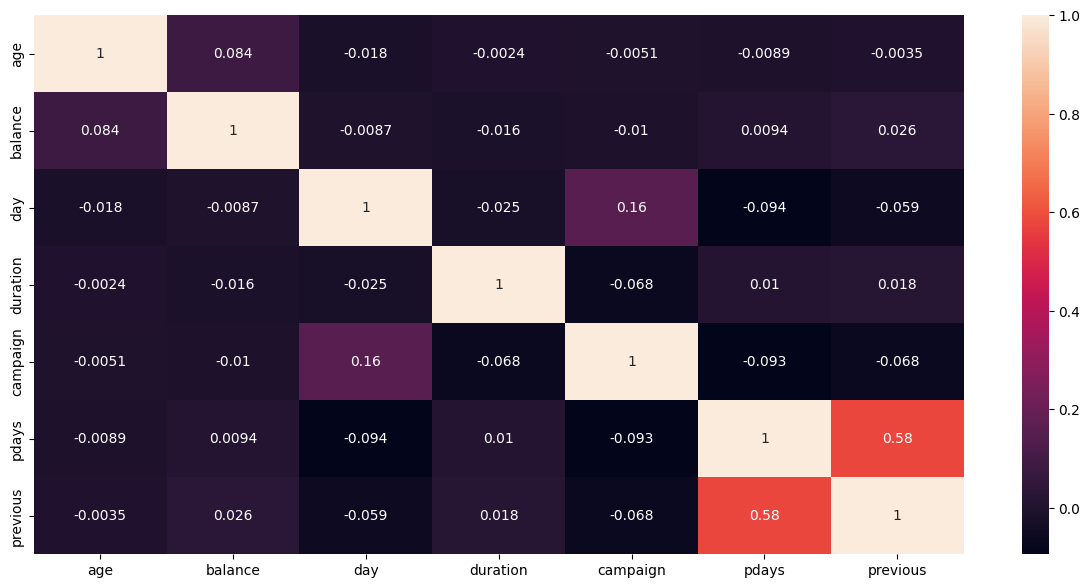

In [ ]:
cor_mat=df.corr()#This line calculates the correlation matrix for df
fig = plt.figure(figsize=(15,7))#This line creates a new figure for our plot the figure will have a width of 15 units and a height of 7 units.
sns.heatmap(cor_mat,annot=True)#cor_mat DataFrame will have rows and columns annot true parameter adds annotations (the actual correlation values) to the cells of the heatmap, making it easier to interpret the heatmap

In [ ]:
df.info()
#we are checking the structure of the data
#it shows the information about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


In [ ]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000,4521.000000
mean,41.170095,1422.657819,15.915284,263.961292,2.793630,39.766645,0.542579
std,10.576211,3009.638142,8.247667,259.856633,3.109807,100.121124,1.693562
min,19.000000,-3313.000000,1.000000,4.000000,1.000000,-1.000000,0.000000
25%,33.000000,69.000000,9.000000,104.000000,1.000000,-1.000000,0.000000
50%,39.000000,444.000000,16.000000,185.000000,2.000000,-1.000000,0.000000
75%,49.000000,1480.000000,21.000000,329.000000,3.000000,-1.000000,0.000000
max,87.000000,71188.000000,31.000000,3025.000000,50.000000,871.000000,25.000000


In [ ]:
df.shape

(4521, 17)

checking the types of data in a dataset

In [ ]:
df.dtypes
#here we check for datatypes because

age           int64
job          object
marital      object
education    object
default      object
balance       int64
housing      object
loan         object
contact      object
day           int64
month        object
duration      int64
campaign      int64
pdays         int64
previous      int64
poutcome     object
y            object
dtype: object

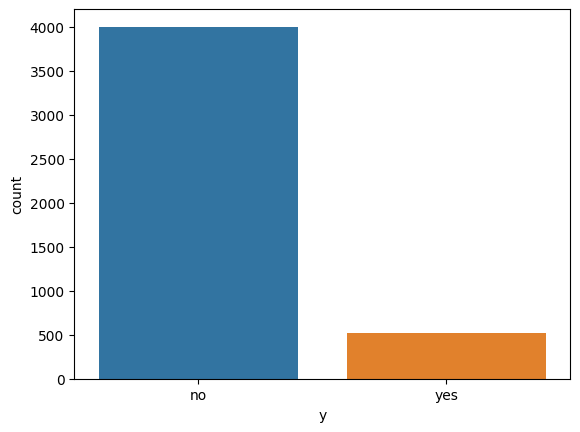

In [ ]:
sns.countplot(x='y', data=df)
plt.show()

**identifying whether our dataset has any missing values**

In [ ]:


# Load the dataset
df = pd.read_csv('/content/bank marketing.csv')  # Replace with the actual file path

# Check for missing values
missing_values = df.isna().sum()

# Display the result
if missing_values.sum() == 0:
    print("No missing values found in the dataset.")
else:
    print("Missing values found in the dataset:")
    print(missing_values)

No missing values found in the dataset.


**weeding out outliers through statistical means**



1.visualization of data distribution for an numerical values


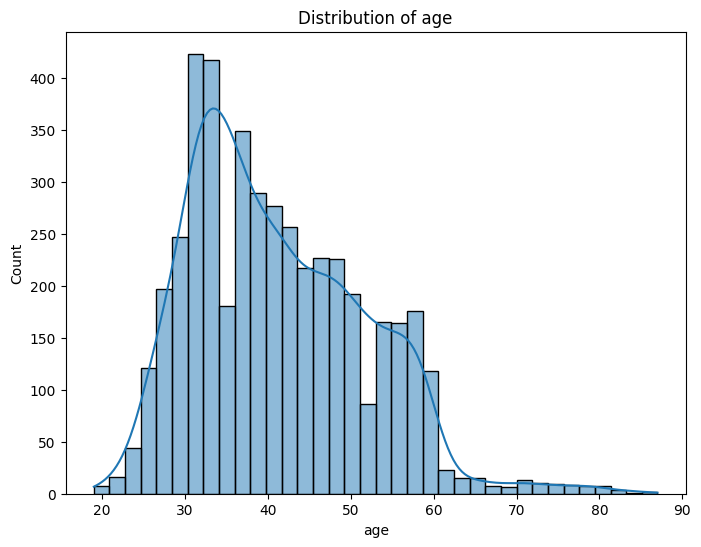

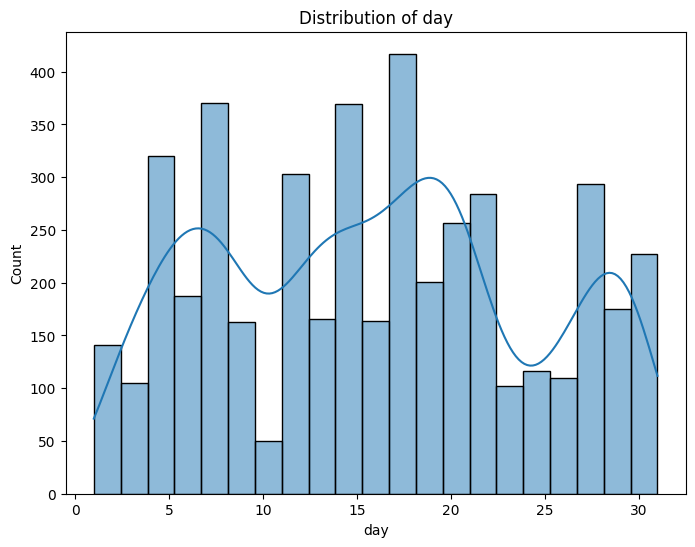

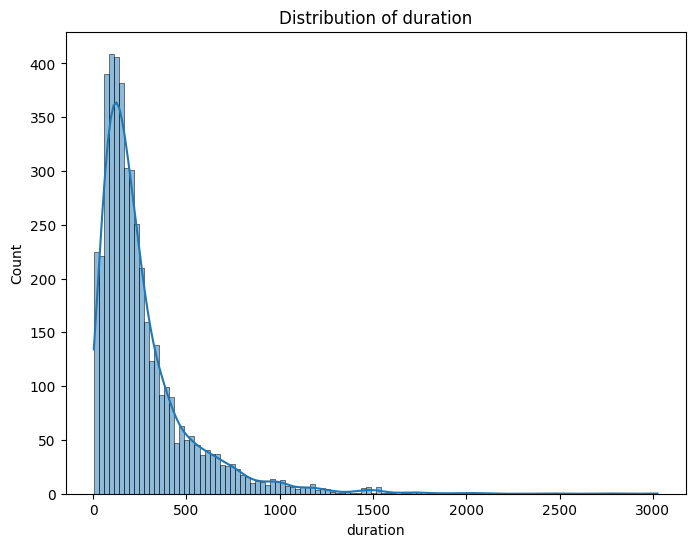

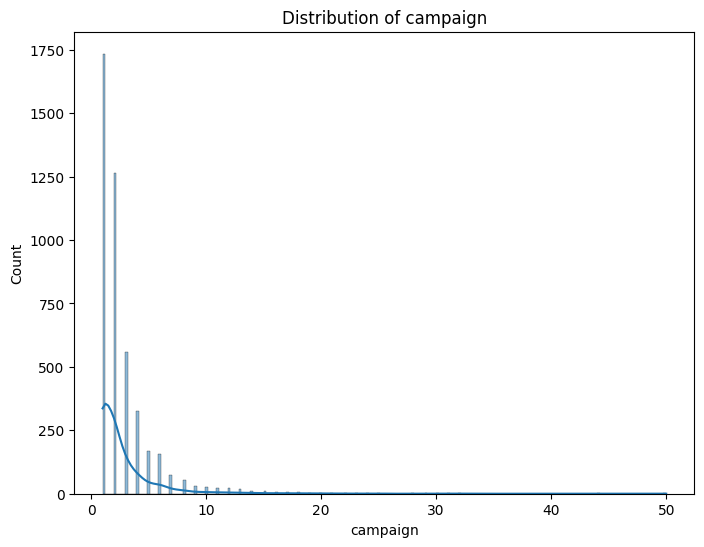

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical columns for visualization
numerical_columns = ['age','day','duration','campaign']

# Create histograms for numerical variables
for col in numerical_columns:
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()
# here we are just visualizing data  of a numerical values in a dataset using a histogram graph for example for age we are distributing the values under certain range with respect to the numerical values









2.identifying outliers using zscore

In [ ]:
from scipy.stats import zscore

# Calculate z-scores for numerical columns
z_scores = zscore(df[numerical_columns])

# Set a threshold for identifying outliers
z_threshold = 3


# Identify outliers using z-scores
outliers = (z_scores > z_threshold) | (z_scores < -z_threshold)

# Display indices of rows with outliers
outlier_indices = df.index[outliers.any(axis=1)]
print ("z_score outliers are:",outlier_indices)#here our outliers are 391

z_score outliers are: Int64Index([  36,   39,   51,  125,  129,  166,  199,  203,  209,  259,
            ...
            4323, 4337, 4342, 4357, 4388, 4403, 4447, 4495, 4505, 4511],
           dtype='int64', length=216)


Winsorization:
Winsorization involves replacing extreme outlier values with values that are within a specified range. This method can help mitigate the impact of outliers while retaining the overall distribution.

In [ ]:
from scipy.stats.mstats import winsorize

# Winsorize numerical columns
df_winsorized = df.copy()
for col in numerical_columns:
    df_winsorized[col] = winsorize(df_winsorized[col], limits=[0.05, 0.05])

# Compare the original and winsorized data
print("Original data:")
print(df[numerical_columns].describe())
print("\nWinsorized data:")
print(df_winsorized[numerical_columns].describe())


Original data:
               age          day     duration     campaign
count  4521.000000  4521.000000  4521.000000  4521.000000
mean     41.170095    15.915284   263.961292     2.793630
std      10.576211     8.247667   259.856633     3.109807
min      19.000000     1.000000     4.000000     1.000000
25%      33.000000     9.000000   104.000000     1.000000
50%      39.000000    16.000000   185.000000     2.000000
75%      49.000000    21.000000   329.000000     3.000000
max      87.000000    31.000000  3025.000000    50.000000

Winsorized data:
               age          day     duration     campaign
count  4521.000000  4521.000000  4521.000000  4521.000000
mean     40.958637    15.939394   248.318071     2.537049
std       9.635081     8.162934   199.012223     1.933293
min      27.000000     3.000000    31.000000     1.000000
25%      33.000000     9.000000   104.000000     1.000000
50%      39.000000    16.000000   185.000000     2.000000
75%      49.000000    21.000000   329.0

<ipython-input-271-d1055d820d99>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor_mat=df.corr()


<Axes: >

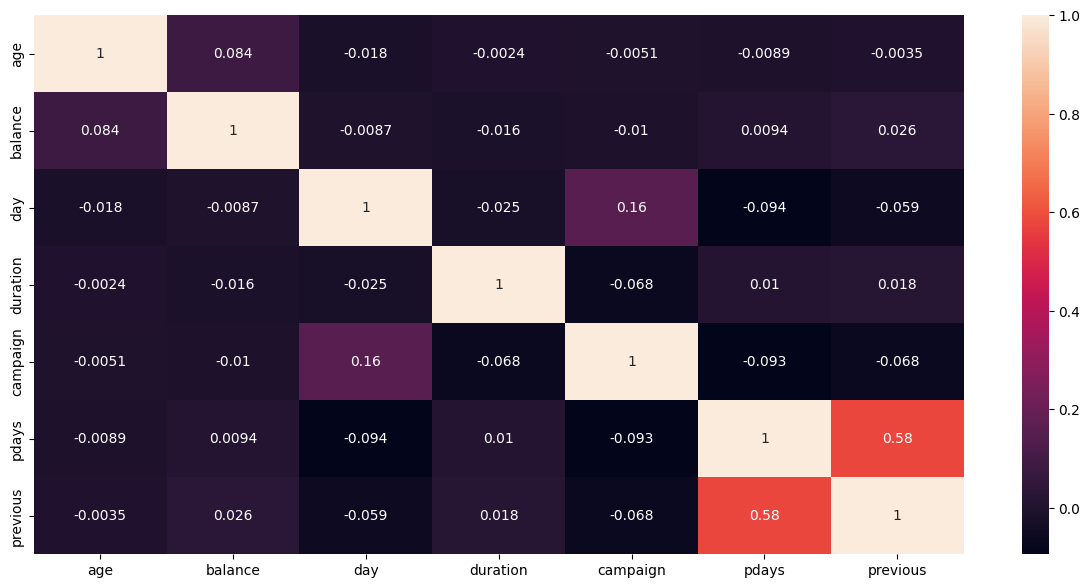

In [ ]:
cor_mat=df.corr()
fig = plt.figure(figsize=(15,7))
sns.heatmap(cor_mat,annot=True)

**Framing questions that are related to the** **objective**


In [ ]:
#What is the success rate of the marketing campaign (conversion rate)?

# Load the dataset
data = pd.read_csv('/content/bank marketing.csv')

# Calculate the conversion rate
conversion_rate = (data['y'].value_counts()['yes'] / len(data)) * 100
print(f"Conversion rate: {conversion_rate:.2f}%")

Conversion rate: 11.52%


 What is the marital status of most clients in the dataset?

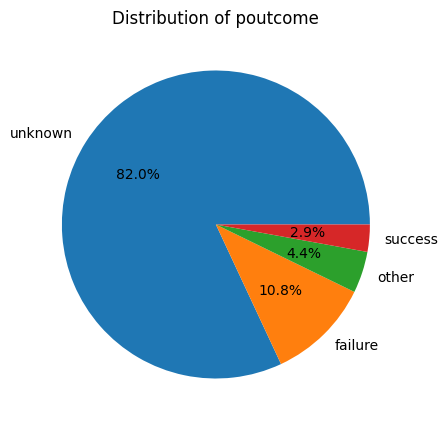

In [ ]:
# Plot the distribution of marital statuses
plt.figure(figsize=(8, 5))
data['poutcome'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title("Distribution of poutcome")
plt.ylabel('')
plt.show()


 What is the highest education level attained by clients in the dataset?

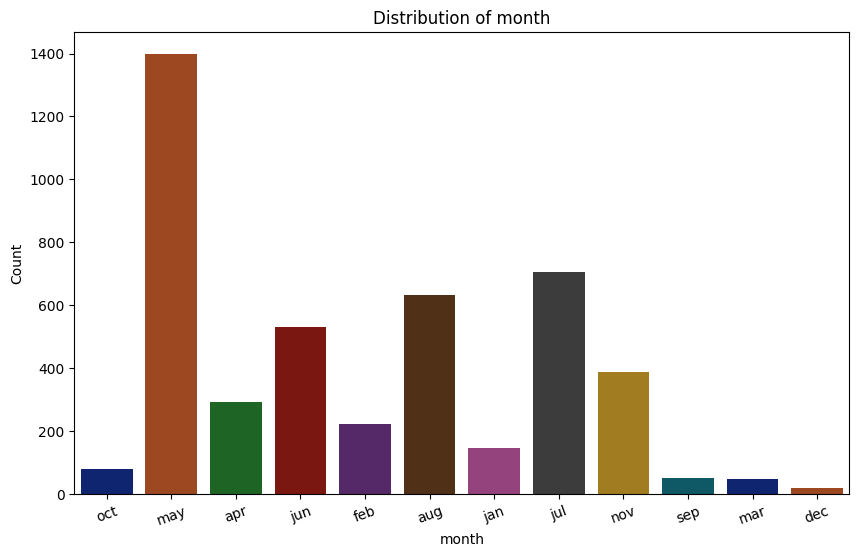

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=data, x='month', palette='dark')
plt.title("Distribution of month")
plt.xlabel('month')
plt.ylabel('Count')
plt.xticks(rotation=20)
plt.show()


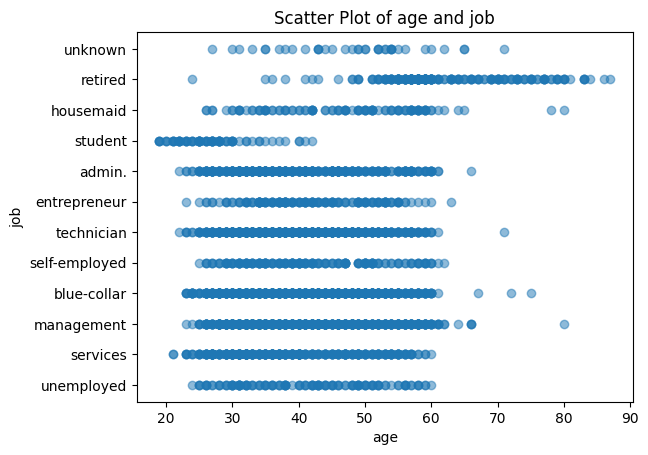

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming you have a CSV file containing your bank marketing dataset
# Replace 'your_dataset.csv' with the actual file path or URL
file_path = '/content/bank marketing.csv'

# Load the dataset into a Pandas DataFrame
df = pd.read_csv("/content/bank marketing.csv")

# Assuming your dataset has columns named 'x_column' and 'y_column'
# Replace them with the actual column names from your dataset
x_column = 'age'
y_column = 'job'

# Create a scatter plot
plt.scatter(df[x_column], df[y_column], alpha=0.5)
plt.title('Scatter Plot of age and job')
plt.xlabel(x_column)
plt.ylabel(y_column)
plt.show()


In [ ]:
df=pd.read_csv("/content/bank marketing.csv")
#create dummy variables for the categorical features
pd.get_dummies(df,drop_first=True)
#print the head of the data frame
print(df.head())

   age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no  


Allocation of Dummy variables

In [ ]:
# Replacements for the 'job' column
df['job'].replace(['unknown','students','unemployed','housemaid','blue-collar','retired'], 0, inplace=True)
df['job'].replace(['enterpreneurs','self-employed','technician','administrator',],1 , inplace=True)

#Replacements for the 'education' column
df['education'].replace(['primary', 0], inplace=True)
df['education'].replace(['secondary', 1], inplace=True)
df['education'].replace(['tertiary', 2], inplace=True)

# Replacements for the 'marital' column
df['marital'].replace(['married', 0], inplace=True)
df['marital'].replace(['single', 1], inplace=True)

# Replacements for the 'housing' column
df['housing'].replace(['yes', 1], inplace=True)
df['housing'].replace(['no', 0], inplace=True)


In [ ]:
month_mapping = {
    'jan': 1, 'feb': 1, 'mar': 1,
    'apr': 2, 'may': 2, 'jun': 2,
    'jul': 3, 'aug': 3, 'sep': 3,
    'oct': 4, 'nov': 4, 'dec': 4
}
# Convert 'month' column to strings and create 'quarter' column based on the mapping
df['quarter'] = df['month'].astype(str).map(month_mapping)

# Use pd.get_dummies to create binary columns for each quarter
quarters_dummies = pd.get_dummies(df['quarter'], prefix='q')

# Concatenate the original DataFrame with the new binary columns
df = pd.concat([df, quarters_dummies], axis=1)

# Drop the original 'month' and 'quarter' columns if needed
df = df.drop(['month', 'quarter'],axis=1)

In [ ]:
dummy = pd.get_dummies(df, drop_first=True)
dummy

,age,balance,day,duration,campaign,pdays,previous,q_1,q_2,q_3,...,marital_married,education_unknown,default_yes,loan_yes,contact_telephone,contact_unknown,poutcome_other,poutcome_success,poutcome_unknown,y_yes
0,30,1787,19,79,1,-1,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
1,33,4789,11,220,1,339,4,0,1,0,...,1,0,0,1,0,0,0,0,0,0
2,35,1350,16,185,1,330,1,0,1,0,...,1,0,0,0,0,0,0,0,0,0
3,30,1476,3,199,4,-1,0,0,1,0,...,1,0,0,1,0,1,0,0,1,0
4,59,0,5,226,1,-1,0,0,1,0,...,1,0,0,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,-333,30,329,5,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4517,57,-3313,9,153,1,-1,0,0,1,0,...,0,1,1,1,0,1,0,0,1,0
4518,57,295,19,151,11,-1,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
4519,28,1137,6,129,4,211,3,1,0,0,...,0,1,0,0,0,0,1,0,0,0


In [ ]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,duration,campaign,pdays,previous,poutcome,y,q_1,q_2,q_3,q_4
0,30,0,married,primary,no,1787,no,no,cellular,19,79,1,-1,0,unknown,no,0,0,0,1
1,33,services,married,primary,no,4789,no,yes,cellular,11,220,1,339,4,failure,no,0,1,0,0
2,35,management,married,primary,no,1350,no,no,cellular,16,185,1,330,1,failure,no,0,1,0,0
3,30,management,married,primary,no,1476,no,yes,unknown,3,199,4,-1,0,unknown,no,0,1,0,0
4,59,0,married,primary,no,0,no,no,unknown,5,226,1,-1,0,unknown,no,0,1,0,0


splitting the dataset into training and testing

**DECISION TREE CLASSIFIER **

In [ ]:
from sklearn.model_selection import train_test_split#Iimporting the necessary libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
X = dummy.iloc[:,:-1]
y = dummy.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state = 2)
X_train.shape , X_test.shape
dt = DecisionTreeClassifier()
dt1= dt.fit (X_train, y_train)#check for model fity_pred = dt.predict(X_test)
y_pred = dt.predict(X_test)
y_pred
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.8784530386740331


splitting dataset in feature and target variables

In [ ]:
X = dummy.iloc[:,:-1]
y = dummy.iloc[:,-1]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
X_train.shape , X_test.shape
dt = DecisionTreeClassifier()
dt1= dt.fit (X_train, y_train)#check for model fity_pred = dt.predict(X_test)
y_pred = dt.predict(X_test)
y_pred
print("accuracy",metrics.accuracy_score(y_test, y_pred))


accuracy 0.8607221812822402


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
X_train.shape , X_test.shape

((3164, 26), (1357, 26))

In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.65, train_size=0.35, random_state=42)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


In [ ]:
dt = DecisionTreeClassifier()

In [ ]:
dt1= dt.fit (X_train, y_train)#check for model fit

In [ ]:
y_pred = dt.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
X_train.shape , X_test.shape

((3164, 26), (1357, 26))

In [ ]:
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.8621960206337509


**K NEAREST NEIGHBOR**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.75, train_size=0.25, random_state=42)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


In [ ]:
model= KNeighborsClassifier(n_neighbors=5)

In [ ]:
model.fit(X_train, y_train)#fitting k nearest neighbor from the classifier
KNeighborsClassifier()

KNeighborsClassifier()

In [ ]:
y_pred= model.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8732498157700811


LOGISTIC  REGRESSION

In [ ]:
from sklearn.model_selection import train_test_split #Importing the necessary libraries
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 2)
X_train.shape , X_test.shape

((3164, 26), (1357, 26))

In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.75, train_size=0.25, random_state=42)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


In [ ]:
clf = LogisticRegression(max_iter=5000)

In [ ]:
clf.fit (X_train, y_train)

LogisticRegression(max_iter=5000)

In [ ]:
y_pred = clf.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 1], dtype=uint8)

In [ ]:
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.9034635224760501


NAIVE BAYES

In [ ]:
from sklearn.model_selection import train_test_split #Importing the necessary libraries
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 50)
X_train.shape , X_test.shape

((3164, 26), (1357, 26))

In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.75, train_size=0.25, random_state=32)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


In [ ]:
nb = GaussianNB()

In [ ]:
nb.fit (X_train, y_train)

GaussianNB()

In [ ]:
y_pred = nb.predict(X_test)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=uint8)

In [ ]:
print("accuracy",metrics.accuracy_score(y_test, y_pred))

accuracy 0.815033161385409


GRADIENT BOOSTING

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=50)

# Initialize and train the Gradient Boosting Classifier
cls = GradientBoostingClassifier(n_estimators=100, random_state=42)
cls.fit(X_train, y_train)

# Make predictions on the test set
y_pred = cls.predict(X_test)

# Calculate accuracy
print("accuracy",metrics.accuracy_score(y_test, y_pred))


accuracy 0.8983050847457628


In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.65, train_size=0.35, random_state=42)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


RANDOM FOREST

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import LabelEncoder

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)# Create and train a random forest classifier

In [ ]:
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Make predictions
y_pred = rf_classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")


Accuracy: 0.90


SUPPORT VECTOR MACHINE

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Standardize features by removing the mean and scaling to unit variance
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
# Create an SVM model
svm_model = SVC(kernel='linear')

# Train the model
svm_model.fit(X_train_scaled, y_train)
# Make predictions
y_pred = svm_model.predict(X_test_scaled)

# Evaluate accuracy
print("accuracy",metrics.accuracy_score(y_test, y_pred))




accuracy 0.8960943257184967


CLASSIFICATION REPORT

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
# Generate predictions
knn_predictions = model.predict(X_test)
nb_predictions = nb.predict(X_test)
dt_predictions = dt.predict(X_test)
logistic_predictions = clf.predict(X_test)
random_predictions = rf_classifier.predict(X_test)
gradient_predictions = cls.predict(X_test)
svm_predictions = svm_model.predict(X_test)
nn_predictions = model.predict(X_test)

# Create classification reports
knn_report = classification_report(y_test, knn_predictions)
nb_report = classification_report(y_test, nb_predictions)
dt_report = classification_report(y_test, dt_predictions)
logistic_report = classification_report(y_test, logistic_predictions)
random_report = classification_report(y_test, random_predictions)
gradient_report = classification_report(y_test, gradient_predictions)
svm_report = classification_report(y_test, svm_predictions)
nn_report = classification_report(y_test, nn_predictions )

# Print the classification reports
print("K-Nearest Neighbors Classification Report:")
print(knn_report)

print("\nNaive Bayes Classification Report:")
print(nb_report)

print("\nDecision Tree Classification Report:")
print(dt_report)

print("\nlogistic regression Classification Report:")
print(logistic_report)

print("\nrandom forest Classification Report:")
print(random_report)

print("\ngradient boosting  Classification Report:")
print(gradient_report)

print("\nsvm  Classification Report:")
print(svm_report)

print("\nneural network  Classification Report:")
print(nn_report)






/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but SVC was fitted without feature names
  warnings.warn(


K-Nearest Neighbors Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.97      0.95      1205
           1       0.62      0.36      0.46       152

    accuracy                           0.90      1357
   macro avg       0.77      0.67      0.70      1357
weighted avg       0.89      0.90      0.89      1357


Naive Bayes Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.85      0.89      1205
           1       0.27      0.44      0.34       152

    accuracy                           0.80      1357
   macro avg       0.60      0.65      0.61      1357
weighted avg       0.85      0.80      0.82      1357


Decision Tree Classification Report:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1205
           1       0.81      0.84      0.83       152

    accuracy                           0.96      1357
   macro av

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


**NEURAL NETWORK**

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Perform train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)
#train_data, test_data = train_test_split(data, test_size=0.75, train_size=0.25, random_state=42)

# Scale the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Build the neural network model
model = tf.keras.Sequential([
    tf.keras.layers.Dense(65, activation='relu', input_shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(32, activation='relu'),
    #tf.keras.layers.Dense(3, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adamax', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=42, validation_data=(X_test, y_test))


Epoch 1/10
87/87 [==============================] - 2s 7ms/step - loss: 0.4146 - accuracy: 0.8662 - val_loss: 0.3218 - val_accuracy: 0.8950
Epoch 2/10
87/87 [==============================] - 1s 7ms/step - loss: 0.3124 - accuracy: 0.8850 - val_loss: 0.2852 - val_accuracy: 0.8972
Epoch 3/10
87/87 [==============================] - 1s 7ms/step - loss: 0.2862 - accuracy: 0.8883 - val_loss: 0.2637 - val_accuracy: 0.9006
Epoch 4/10
87/87 [==============================] - 0s 3ms/step - loss: 0.2721 - accuracy: 0.8941 - val_loss: 0.2514 - val_accuracy: 0.9028
Epoch 5/10
87/87 [==============================] - 0s 5ms/step - loss: 0.2632 - accuracy: 0.8966 - val_loss: 0.2438 - val_accuracy: 0.9028
Epoch 6/10
87/87 [==============================] - 0s 4ms/step - loss: 0.2576 - accuracy: 0.8974 - val_loss: 0.2390 - val_accuracy: 0.9017
Epoch 7/10
87/87 [==============================] - 0s 3ms/step - loss: 0.2533 - accuracy: 0.8996 - val_loss: 0.2355 - val_accuracy: 0.9017
Epoch 8/10
87/87 [==

In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Accuracy: {accuracy*100:.2f}%")

29/29 [==============================] - 0s 7ms/step - loss: 0.2311 - accuracy: 0.9050
Accuracy: 90.50%


In [ ]:
# Assuming 'data' is your dataset
# Splitting with test_size=0.75 and train_size=0.25
train_data, test_data = train_test_split(data, test_size=0.65, train_size=0.35, random_state=42)

# 'train_data' will contain 25% of the data for training
# 'test_data' will contain 75% of the data for testing


**MULTICOLLINEARITY**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
  vif = pd.DataFrame()
  vif["variables"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  return (vif)


In [ ]:
calc_vif(X)


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:198: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,variables,VIF
0,age,1.150454
1,balance,1.044702
2,day,1.067784
3,duration,1.013389
4,campaign,1.086890
5,pdays,4.524093
6,previous,1.891720
7,q_1,inf
8,q_2,inf
9,q_3,inf
